# Introduction (getting help)

This is an example of exploratory data analysis on a relatively clean dataset. We'll use primarily `pandas` and `matplotlib` to visualize basic properties of the data.

If you're stuck or have a question, here are your main options:

* Read the documentation. To do this in a notebook, type the variable name, then a dot, and press `TAB` to view that object's attributes. You can also type `NAME?` to get the documentation for `NAME`, or `NAME??` to see the source code for `NAME`. (If this is unclear, ask me about it :)
* Google it. This will usually turn up the official documentation as well as StackOverflow questions (which you should read).
* Ask me or someone else who knows pandas.

In [1]:
import pandas as pd

I downloaded `train.csv` from [here](https://www.kaggle.com/c/titanic/data) and put it in `titanic/`.

In [4]:
train = pd.read_csv('train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.shape

(891, 12)

In [6]:
type(train)

pandas.core.frame.DataFrame

This is a dataframe with 891 rows and 12 columns other than the index.

# Core concepts: the index, how to select data, and how to view documentation

Let's set the **`index`** of the dataframe, and in the process demonstrate how to select data and get documentation in the notebook. The index is how we uniquely identify each data point in the dataframe -- in other words, it's the names of the rows and columns. If you look at the table above, the farthest-left column has no name and runs from 0 to 890. This is the index of the dataframe, which you can see is a special type of pandas object:

In [9]:
train.index

RangeIndex(start=0, stop=891, step=1)

The columns of the dataframe are an index too:

In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In this case there are two indices since the object is a dataframe; a series would only have one index because it is one-dimensional.

Let's set the row index to `PassengerId`:

In [12]:
train.set_index('PassengerId', inplace=True)
# train = train.set_index('PassengerId') <------- alternative to the above

In [13]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Since the index identifies each data point uniquely, we can use it to get values in the dataframe. We do this using `.loc`:

In [11]:
train.loc?

Type:        property
String form: <property object at 0x000001DCE2F332C8>
Docstring:  
Purely label-location based indexer for selection by label.

``.loc[]`` is primarily label based, but may also be used with a
boolean array.

Allowed inputs are:

- A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
  interpreted as a *label* of the index, and **never** as an
  integer position along the index).
- A list or array of labels, e.g. ``['a', 'b', 'c']``.
- A slice object with labels, e.g. ``'a':'f'`` (note that contrary
  to usual python slices, **both** the start and the stop are included!).
- A boolean array.
- A ``callable`` function with one argument (the calling Series, DataFrame
  or Panel) and that returns valid output for indexing (one of the above)

``.loc`` will raise a ``KeyError`` when the items are not found.

See more at :ref:`Selection by Label <indexing.label>`


Notice that `.loc` is capable of more than we use it for here.

You can treat `.loc` like a Python list or tuple, using brackets to select elements. We'll use Passenger 10 as an example:

In [15]:
example = train.loc[10]

In [16]:
example

Survived                                      1
Pclass                                        2
Name        Nasser, Mrs. Nicholas (Adele Achem)
Sex                                      female
Age                                          14
SibSp                                         1
Parch                                         0
Ticket                                   237736
Fare                                    30.0708
Cabin                                       NaN
Embarked                                      C
Name: 10, dtype: object

In [17]:
type(example)

pandas.core.series.Series

Observe that this returned a series of values for this particular passenger, one value per column of the dataframe.

Since `example` is a series, we can use `.loc` on it, too:

In [18]:
example.loc['Name']

'Nasser, Mrs. Nicholas (Adele Achem)'

Further, we can combine these into one line of code:

In [19]:
train.loc[10, 'Name']

'Nasser, Mrs. Nicholas (Adele Achem)'

Note that `.loc` is not always necessary, but is the safest way to access data: 

In [22]:
train['Name'][10] # <----- don't do this!

'Nasser, Mrs. Nicholas (Adele Achem)'

However, it's best practice to **always** avoid the practice above -- called *chained indexing*. The reasons are technicalities of pandas, but a google search will explain it if you're curious.

If you want to select based on position (zero-indexed) instead of index label, you can use `.iloc`:

In [24]:
train.iloc[9]

Survived                                      1
Pclass                                        2
Name        Nasser, Mrs. Nicholas (Adele Achem)
Sex                                      female
Age                                          14
SibSp                                         1
Parch                                         0
Ticket                                   237736
Fare                                    30.0708
Cabin                                       NaN
Embarked                                      C
Name: 10, dtype: object

# EDA


In [25]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's look at the means of the numeric variables:

In [39]:
train.describe().round(2)

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


Only 38% of people on the Titanic survived.

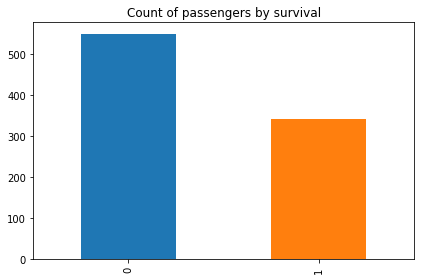

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

train['Survived'].value_counts().plot(kind='bar', title='Count of passengers by survival')


plt.tight_layout()

What if we want to change the labels underneath the x-axis? We can save the plot to a variable and modify it:

matplotlib.axes._subplots.AxesSubplot

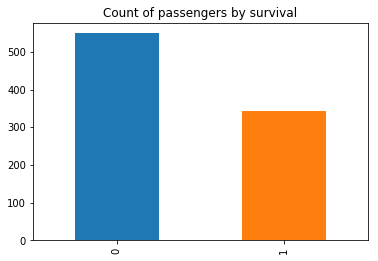

In [58]:
ax = train['Survived'].value_counts().plot(kind='bar', title='Count of passengers by survival')
type(ax)

Matplotlib represents a plot with an object called an `Axes` (in this case, `AxesSubplot`). An axes is contained by a figure, and has some nice methods we can use to set various aspects of the plot:

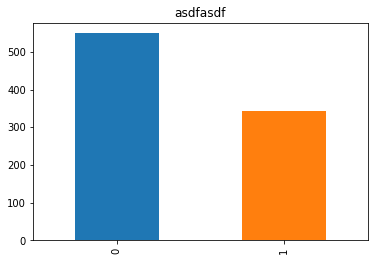

In [63]:
ax.set(title='asdfasdf')
ax.figure

Now, about those x-labels:

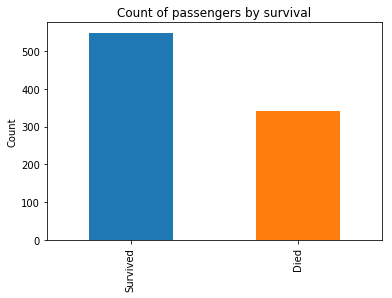

In [76]:
ax.set(title='Count of passengers by survival', xticklabels=['Survived', 'Died'], ylabel='Count')
ax.figure

What about rotating the labels? Here's a hack:

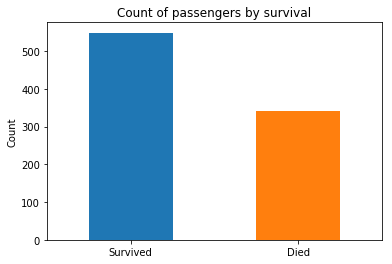

In [78]:
[tick.set_rotation(0) for tick in ax.get_xticklabels()]
ax.figure

This plot is done!